In [20]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wines_df = pd.read_csv("wine.csv")
wines_df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [21]:
# List all the columns
wines_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [22]:
# summary about dataset
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


In [23]:
# Get basic Statistical details
wines_df.describe()


,Unnamed: 0,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


In [24]:
# The Unnamed column is not necessary so we can drop it.
wines_df = wines_df.iloc[: , 1:]

# check if the table was droped
wines_df.describe()

,points,price
count,1103.000000,1046.000000
mean,89.701723,40.242830
std,2.390405,32.588141
min,85.000000,7.000000
25%,88.000000,20.000000
50%,90.000000,31.000000
75%,91.000000,50.000000
max,96.000000,500.000000


In [25]:
# To check missing values
wines_df.isnull().sum()


country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

In [26]:
#fortunately in this dataset the misiing values do not greatly affect the EDA
# we can say that the data is MAR because we can predict the price values

# We are only going to ungergo imputation for the price column 
# we will calculate the average price and insert the value to all the NaN values


#calculate the average
ave_price=wines_df['price'].mean()

wines_df['price'].fillna(ave_price, inplace=True)

# check if there are still missing values for price
wines_df.isnull().sum()

country          0
description      0
designation    269
points           0
price            0
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

Text(0.5, 1.0, 'Points for the different wines')

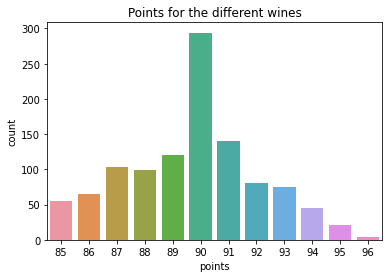

In [27]:
# check how the data is distributed.
sns.countplot(x='points', data = wines_df)
plt.title("Points for the different wines")

Text(0.5, 1.0, 'Prices for the different wines')

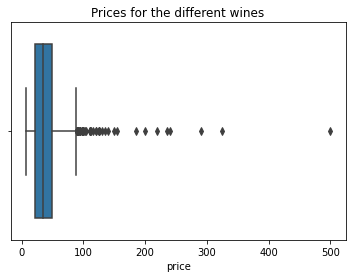

In [28]:
# box plot for price
sns.boxplot(x='price', data = wines_df)
plt.title("Prices for the different wines")

Text(0.5, 1.0, 'Price Vs Points')

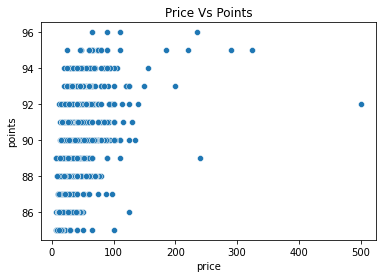

In [29]:
# relationship between price and points
sns.scatterplot(x=wines_df['price'], y=wines_df['points'])
plt.title("Price Vs Points")

Text(0.5, 1.0, 'Price Vs Points')

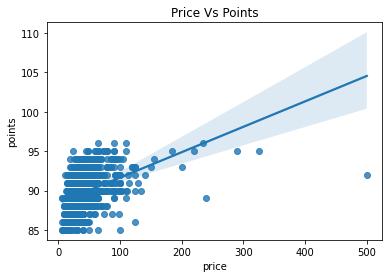

In [30]:
# relationship between price and points
sns.regplot(x=wines_df['price'], y=wines_df['points'])
plt.title("Price Vs Points")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

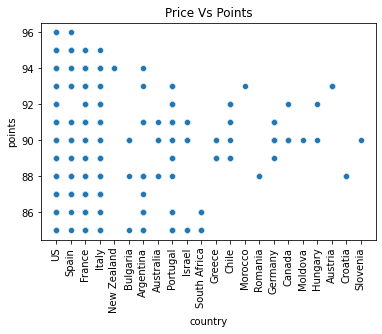

In [105]:
# relationship between price and country
sns.scatterplot(x=wines_df['country'], y=wines_df['points'])
plt.title("Price Vs Points")
plt.xticks(rotation=90)

Text(0, 0.5, 'Price')

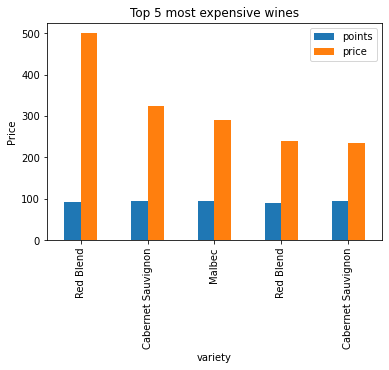

In [31]:
# Sort the price column to the top 5 most expensive wines
top_5 = wines_df.sort_values(by="price", ascending=False).head()
top_5.plot(x="variety", kind="bar")
plt.title("Top 5 most expensive wines")
plt.ylabel("Price")

Text(0.5, 1.0, 'Countires with the most expensive wine')

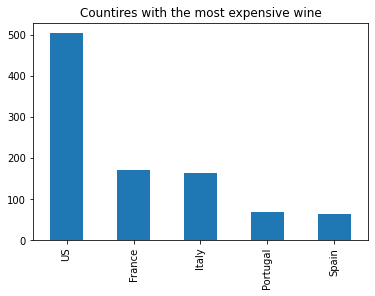

In [32]:
# Sort the price column to the countires with expensive wines
country_top5 = wines_df['country'].value_counts()[:5]
country_top5.plot(kind="bar")
plt.title("Countires with the most expensive wine")

Text(0.5, 1.0, 'Top 10 most common wines')

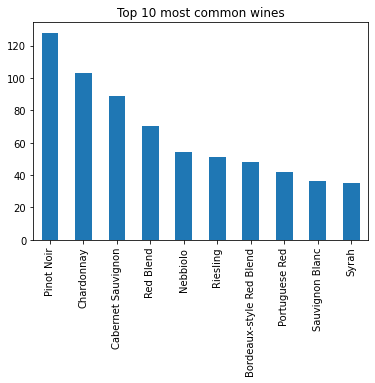

In [33]:
# Sort the variety column to the top 10 most common wines wines
wine = wines_df['variety'].value_counts()[:10]
wine.plot(kind='bar') 
plt.title("Top 10 most common wines")

Text(0.5, 1.0, 'Top 10 most common wineries')

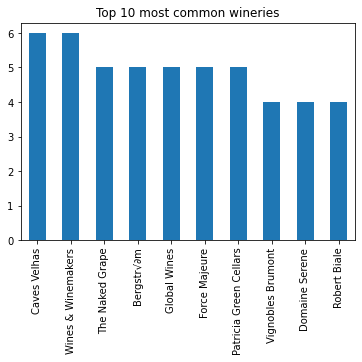

In [34]:
# Sort the price winery to the coloum
winery_top5 = wines_df['winery'].value_counts()[:10]
winery_top5.plot(kind="bar")
plt.title("Top 10 most common wineries")


In [35]:
# most common country that produces wines
wines_df["country"]. value_counts(). idxmax()

'US'

In [36]:
# most common province that produces wines
wines_df["province"]. value_counts(). idxmax()

'California'

In [37]:
# least common country that produces wines
wines_df["country"]. value_counts(). idxmin()

'Morocco'

In [38]:
# least common province that produces wines
wines_df["province"]. value_counts(). idxmin()

'Baden'

In [39]:
#wines with the largest points
wines_df.nlargest(5, ['points'])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [40]:
#wines with the smallest points
wines_df.nsmallest(5, ['points'])

,country,description,designation,points,price,province,region_1,region_2,variety,winery
725,US,"While light in color, this wine is flavorful a...",Salut√©,85,15.0,California,Livermore Valley,Central Coast,Red Blend,Rubino Estates Winery
726,France,This pale ros√© blend of Cabernet Sauvignon an...,B√©lingard,85,9.0,Southwest France,Bergerac Ros√©,NaN,Ros√©,Ch√¢teau B√©lingard
727,France,This is the second label from this Gaillac est...,Les Petits Cl√©ment Merlot Duras,85,16.0,Southwest France,C√¥tes du Tarn,NaN,Red Blend,Ch√¢teau Cl√©ment Termes
728,US,A hint of maple syrup in the aromas and flavor...,NaN,85,15.0,California,California,California Other,Cabernet Sauvignon,Jack's House
729,France,"A blend of 30% Pinot Noir and 70% Gamay, this ...",NaN,85,18.0,Burgundy,Coteaux Bourguignons,NaN,Pinot Noir-Gamay,Joseph Drouhin


In [19]:
# I had issues installing my wordcloud library as it gave me errors
# I used the basic knowledge i had and i am not completely sure if the code runs

# import library
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# put all the words in the columns in a text format
text1 = " ".join(review for review in wines_df.province.astype(str))
text2 = " ".join(review for review in wines_df.variety.astype(str))

# combine the texts from both columns
text = (text1 + text2)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(text)


# Display the generated image
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

There are 25755 words in the combination of all cells in column YOUR_COLUMN_NAME.
